In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [59]:
data=pd.read_csv('/content/drive/MyDrive/CodersCave/Phase_1/Normal_Task/globalterrorism.csv',encoding='latin1')
data.head()

<ipython-input-59-63b7eeb1e9df>:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [60]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [61]:
data_nn=data.dropna(axis=1)

In [62]:
data_nn.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [63]:
data_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   eventid          181691 non-null  int64 
 1   iyear            181691 non-null  int64 
 2   imonth           181691 non-null  int64 
 3   iday             181691 non-null  int64 
 4   extended         181691 non-null  int64 
 5   country          181691 non-null  int64 
 6   country_txt      181691 non-null  object
 7   region           181691 non-null  int64 
 8   region_txt       181691 non-null  object
 9   vicinity         181691 non-null  int64 
 10  crit1            181691 non-null  int64 
 11  crit2            181691 non-null  int64 
 12  crit3            181691 non-null  int64 
 13  success          181691 non-null  int64 
 14  suicide          181691 non-null  int64 
 15  attacktype1      181691 non-null  int64 
 16  attacktype1_txt  181691 non-null  object
 17  targtype1 

In [64]:
data_nn.describe()

,eventid,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,0.068297,0.988530,0.993093,...,0.036507,3.247547,8.439719,0.002950,6.447325,-0.544556,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.284553,0.106483,0.082823,...,0.187549,1.915772,6.653838,0.054234,2.173435,3.122889,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-9.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,3.000000,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,4.000000,0.000000,6.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,14.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### World Map of countries affected by Terrorism

In [65]:
country_counts = data_nn.country_txt.value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']
fig = px.choropleth(country_counts, locations='Country',locationmode='country names',color='Attack Count',
                    title='Terrorist Attacks by Country',labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',projection='natural earth')
fig.show()

### Top regions with highest terrorism

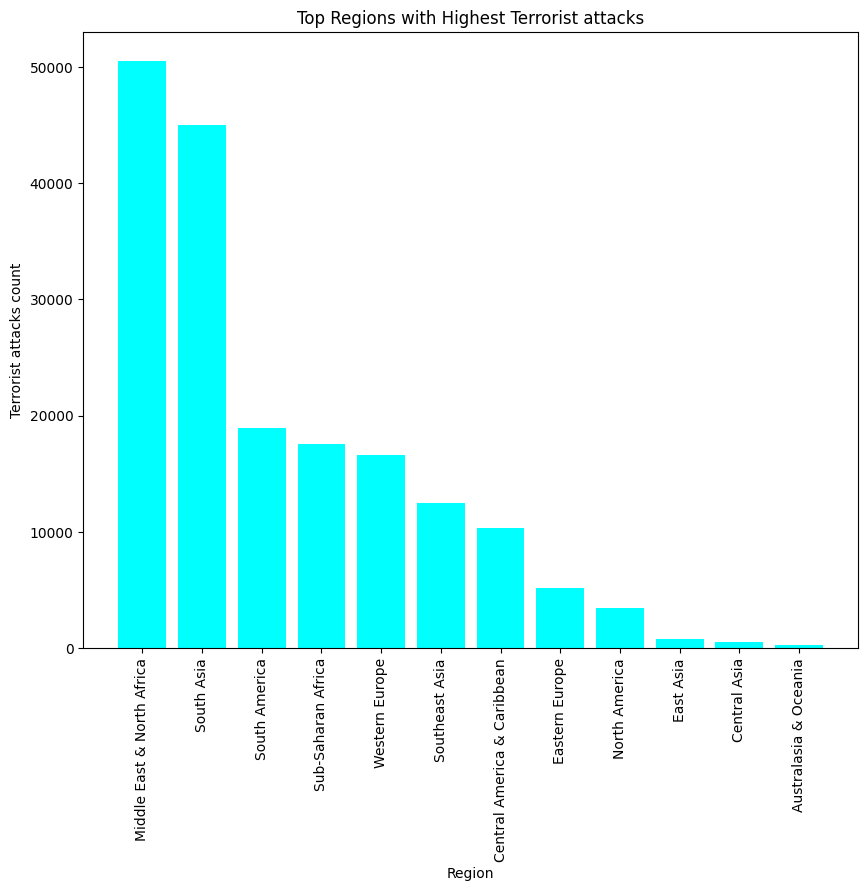

In [66]:
data_nn.region_txt.value_counts()
plt.figure(figsize=(10,8))
plt.bar(data_nn.region_txt.value_counts().index,data_nn.region_txt.value_counts().values,color='cyan')
plt.xlabel('Region')
plt.ylabel('Terrorist attacks count')
plt.title('Top Regions with Highest Terrorist attacks')
plt.xticks(rotation=90)
plt.show()

### Top 10 Countries with highest terrorism

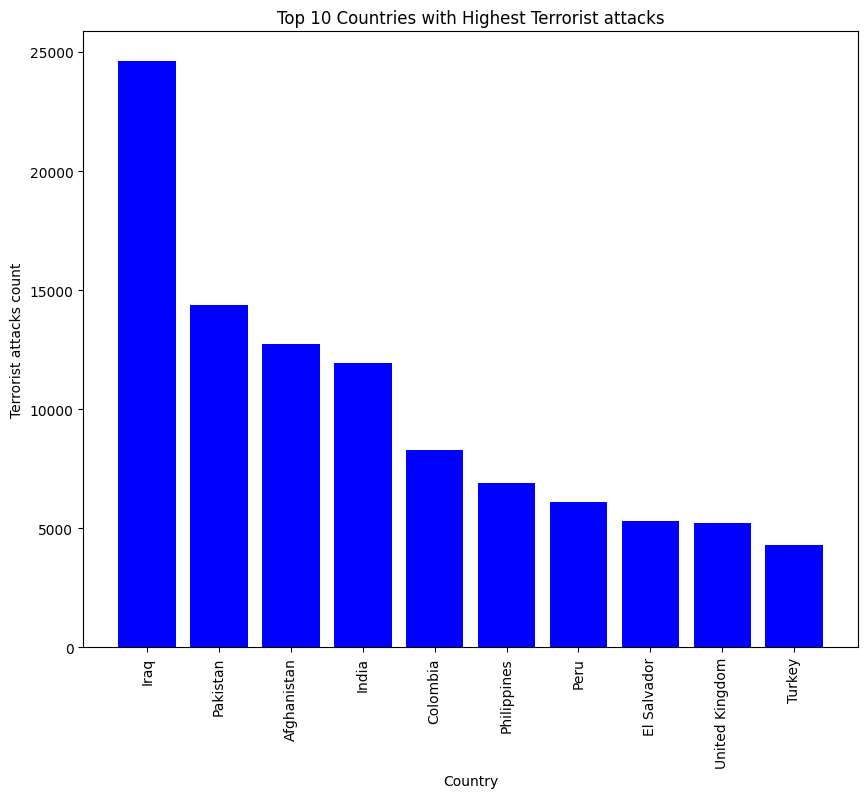

In [67]:
data_nn.country_txt.value_counts()[:10]
plt.figure(figsize=(10,8))
plt.bar(data_nn.country_txt.value_counts()[:10].index,data_nn.country_txt.value_counts()[:10].values,color='blue')
plt.xlabel('Country')
plt.ylabel('Terrorist attacks count')
plt.title('Top 10 Countries with Highest Terrorist attacks')
plt.xticks(rotation=90)
plt.show()

### Most Targeted Places

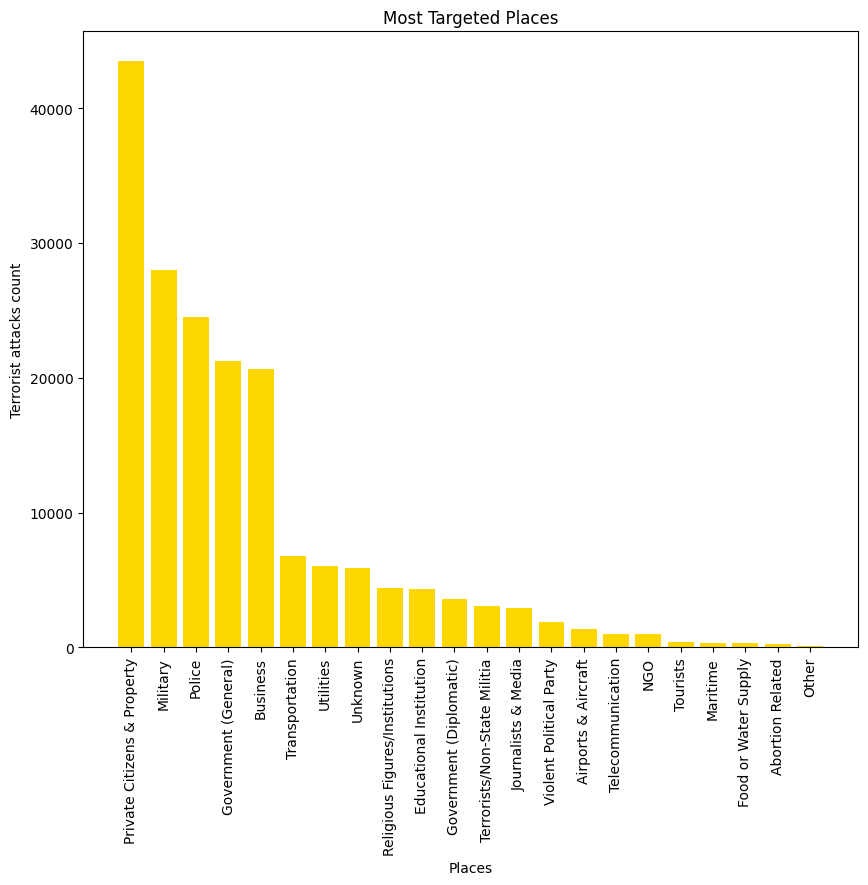

In [68]:
data_nn.targtype1_txt.value_counts()
plt.figure(figsize=(10,8))
plt.bar(data_nn.targtype1_txt.value_counts().index,data_nn.targtype1_txt.value_counts().values,color='gold')
plt.xlabel('Places')
plt.ylabel('Terrorist attacks count')
plt.title('Most Targeted Places')
plt.xticks(rotation=90)
plt.show()

### Most common type of Terrorist attacks

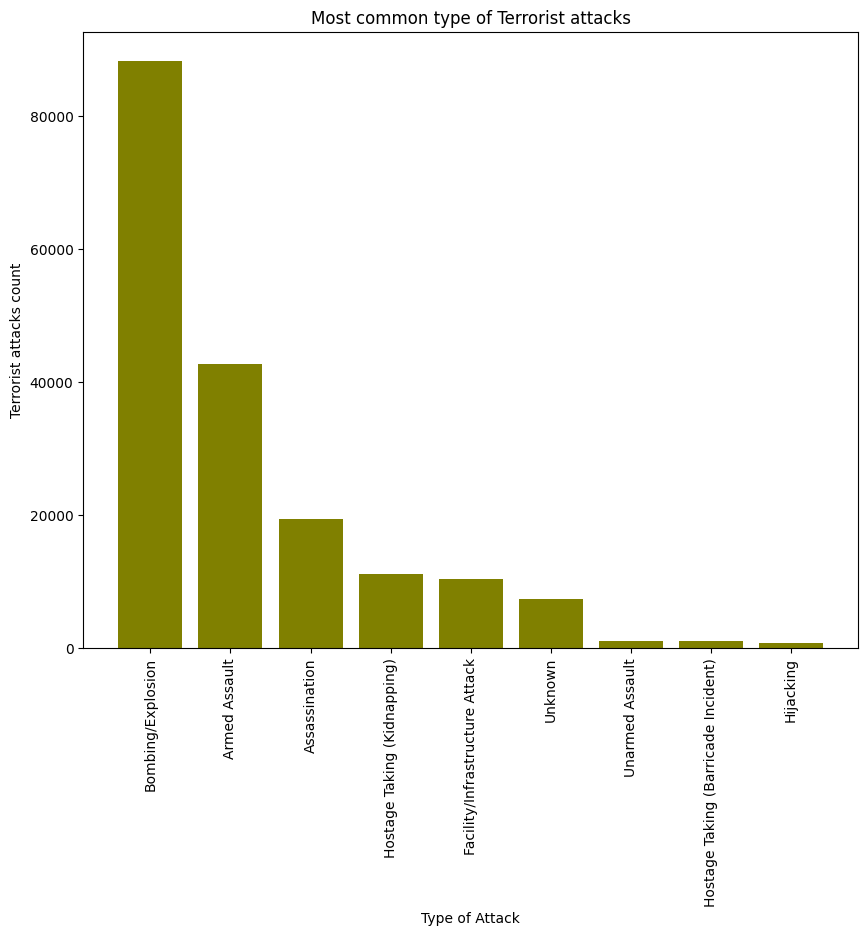

In [69]:
data_nn.attacktype1_txt.value_counts()
plt.figure(figsize=(10,8))
plt.bar(data_nn.attacktype1_txt.value_counts().index,data_nn.attacktype1_txt.value_counts().values,color='olive')
plt.xlabel('Type of Attack')
plt.ylabel('Terrorist attacks count')
plt.title('Most common type of Terrorist attacks')
plt.xticks(rotation=90)
plt.show()

### 10 Most active terrorist groups


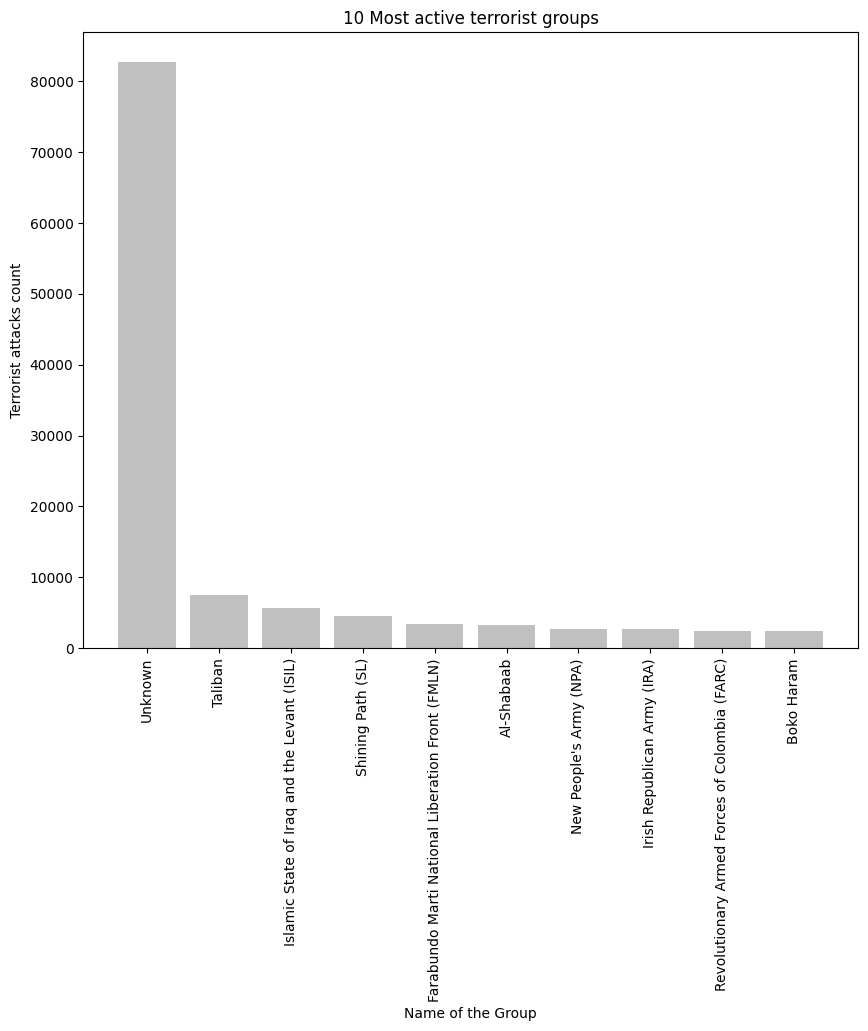

In [70]:
data_nn.gname.value_counts()[:10]
plt.figure(figsize=(10,8))
plt.bar(data_nn.gname.value_counts().index[:10],data_nn.gname.value_counts().values[:10],color='silver')
plt.xlabel('Name of the Group')
plt.ylabel('Terrorist attacks count')
plt.title('10 Most active terrorist groups')
plt.xticks(rotation=90)
plt.show()

### 10 Most used weapons in terrorist attacks

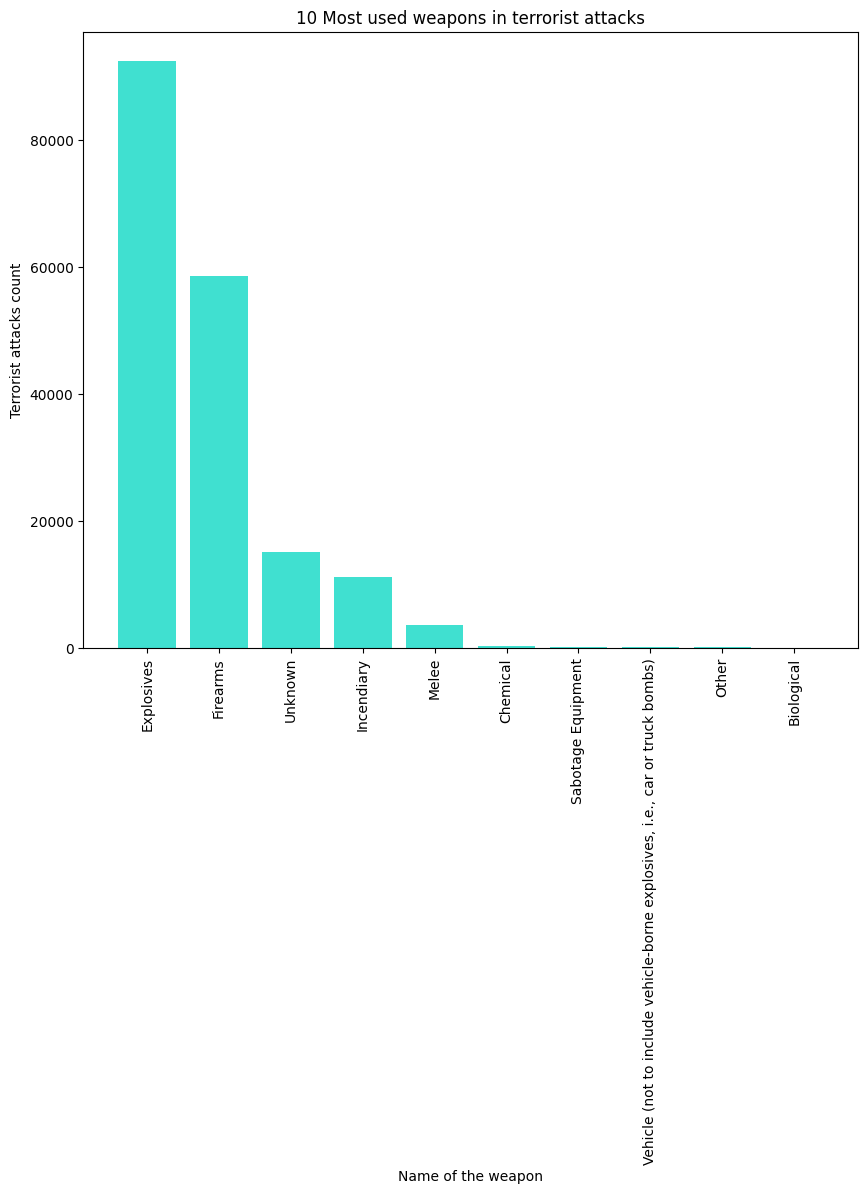

In [71]:
data_nn.weaptype1_txt.value_counts()[:10]
plt.figure(figsize=(10,8))
plt.bar(data_nn.weaptype1_txt.value_counts().index[:10],data_nn.weaptype1_txt.value_counts().values[:10],color='turquoise')
plt.xlabel('Name of the weapon')
plt.ylabel('Terrorist attacks count')
plt.title('10 Most used weapons in terrorist attacks')
plt.xticks(rotation=90)
plt.show()

### Yearwise terrorist attack trend

(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 [Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020')])

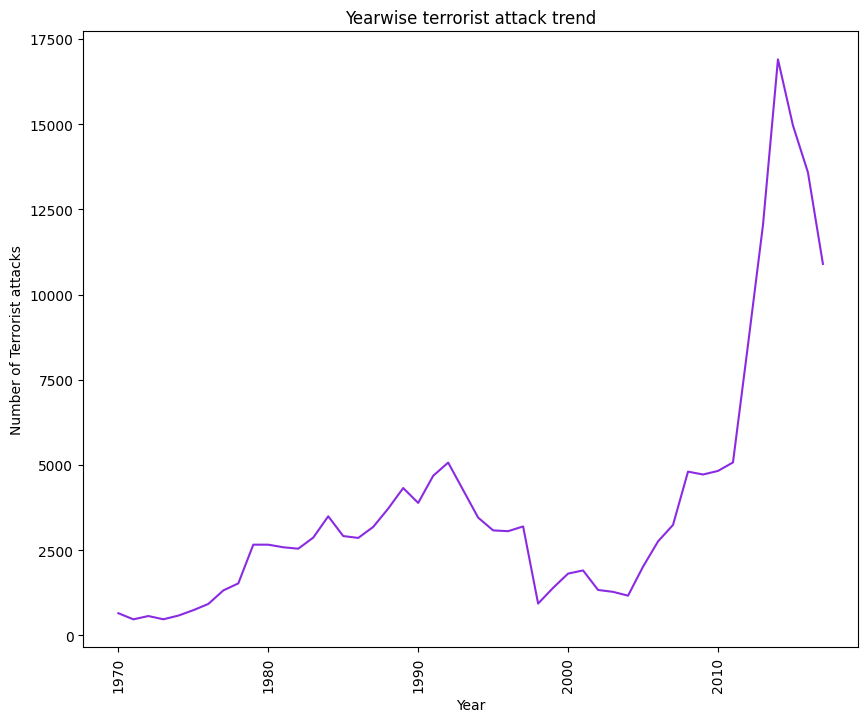

In [72]:
values = data_nn.groupby(['iyear'])['eventid'].count()
plt.figure(figsize=(10,8))
plt.plot(values.index,values.values, color="blueviolet")
plt.xlabel('Year')
plt.ylabel('Number of Terrorist attacks')
plt.title('Yearwise terrorist attack trend')
plt.xticks(rotation=90)